# Multi-Class Logistic Regression

**I performed non binary classification with Logistic. Here I used LogisiticRegression with a manual GridSearchCV (instead of LogisticRegressionCV) for learning purpose.** 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

I used Iris Data Set

Full Details: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [13]:
df = pd.read_csv('../DATA/iris.csv')

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis and Visualization

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<AxesSubplot:xlabel='count', ylabel='species'>

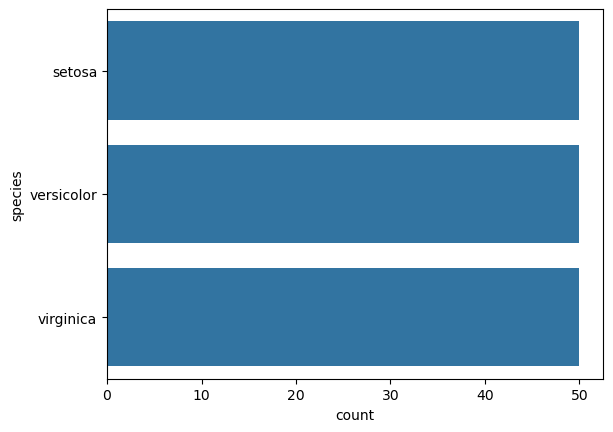

In [18]:
sns.countplot(df['species'])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

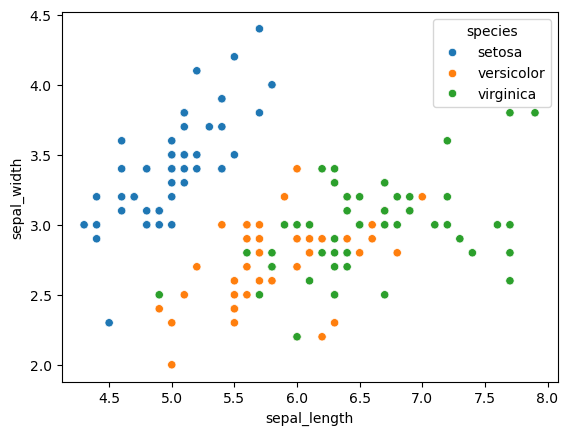

In [19]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

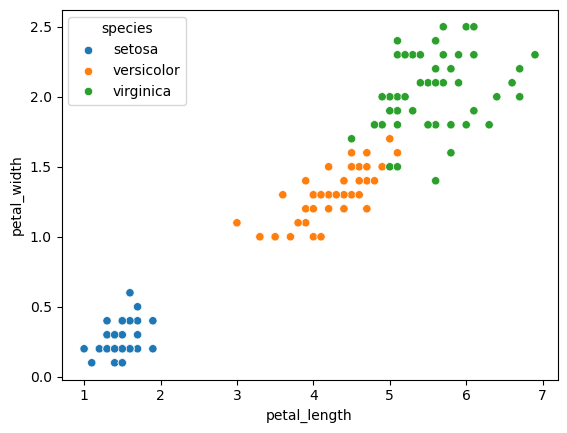

In [20]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

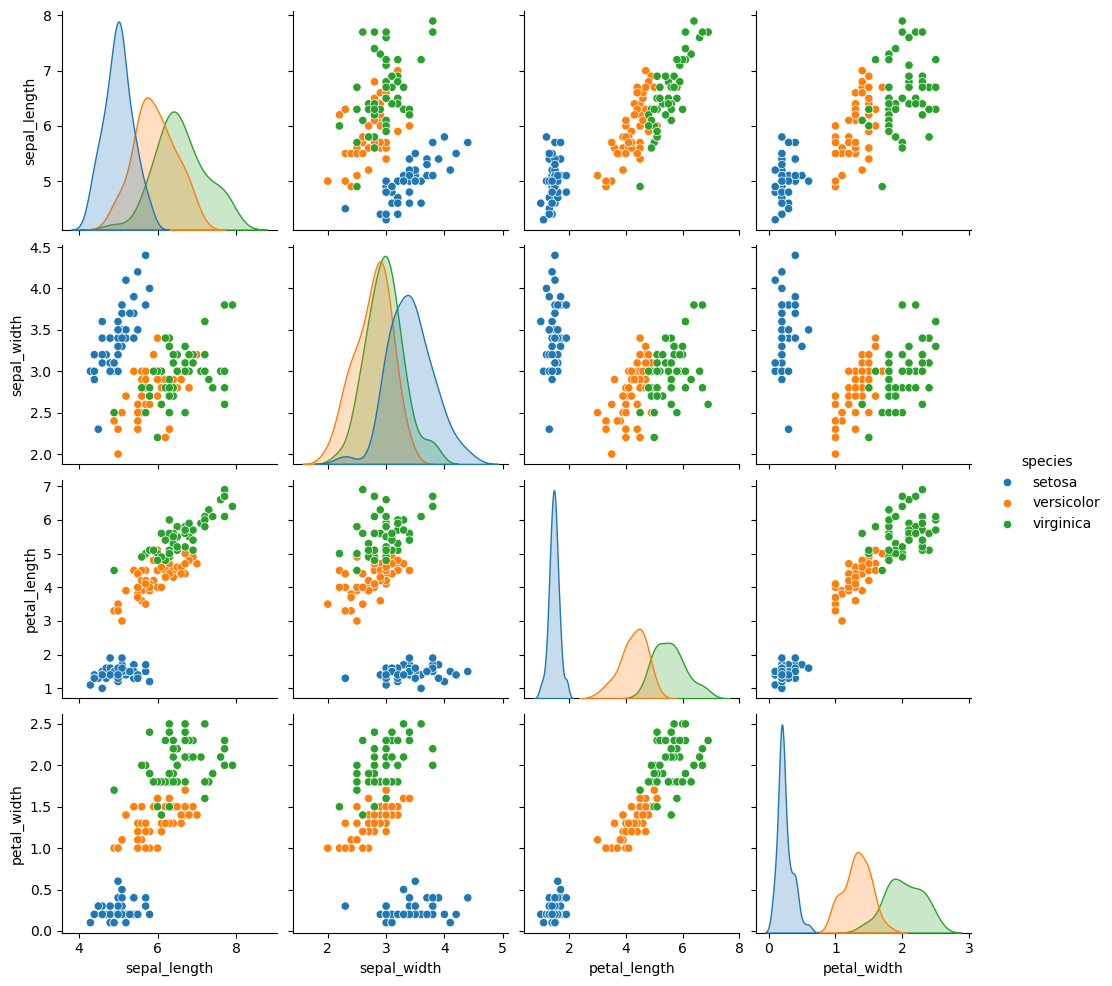

In [21]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

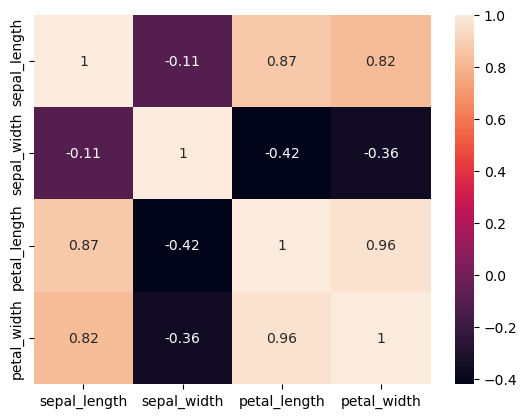

In [23]:
# Select only numeric columns for correlation (drop 'species' column)
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)

**"3d matplotlib scatter plot"**

https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

In [26]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

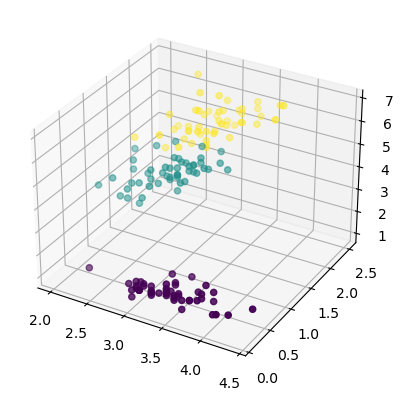

In [27]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

### Train | Test Split and Scaling

In [28]:
X = df.drop('species',axis=1)
y = df['species']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
scaler = StandardScaler()

In [32]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Multi-Class Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.model_selection import GridSearchCV

### solver='saga' 

The solver parameter specifies the algorithm used for optimization in logistic regression.
'saga' is an algorithm that supports both L1 and L2 regularization, with a fast convergence for large datasets. It's particularly useful for datasets with a large number of features or samples.
Choosing the right solver depends on the size of your dataset and the type of regularization you want to apply.

**In the context of logistic regression, a 'solver' is an algorithm used for optimization of the logistic regression cost function.**

Different solvers are suited to different types of datasets and logistic regression problems:

    liblinear: 
        Good for small datasets.
        It supports L1 and L2 regularization.
        It can be slower with large datasets.

    lbfgs, sag, newton-cg:
        These are more suitable for large datasets.
        They only support L2 regularization.
        They can be faster for large datasets but require more memory and computational power.

    saga:
        A variant of sag that also supports L1 regularization.
        Suitable for large datasets.
        It's a good choice if you need L1 regularization, which can provide sparse models (models with more zero coefficients).


### multi_class='ovr'

The multi_class parameter indicates how the logistic regression model handles multiclass classification problems.
'ovr' stands for **“one-vs-rest”** or **“one-vs-all.”** In this approach, a separate model is trained for each class to distinguish it from all other classes, making it suitable for binary or multiclass classification problems.
Each model in 'ovr' outputs a probability that a given sample belongs to its class, and the class with the highest probability is the model's prediction.

Two common strategies to extend binary classifiers to handle multiple classes
**One-vs-Rest (OvR) / One-vs-One (OvO)**

**One-vs-Rest**

    Classifier 1: Class A vs Classes B and C.
    Classifier 2: Class B vs Classes A and C.
    Classifier 3: Class C vs Classes A and B.

    Each classifier predicts whether a sample belongs to its 'one' class or not.
    The classifier with the highest confidence score (e.g., probability in logistic regression) for a sample decides the class of that sample.
    
**One-vs-One**

    Classifier 1: Class A vs Class B.
    Classifier 2: Class A vs Class C.
    Classifier 3: Class B vs Class C.

    If there are N classes, you end up with N*(N-1)/2 classifiers.

    Each classifier votes for a class, and the class with the most votes determines the sample’s classification.
    In case of ties, strategies like class weighting or probabilistic decisions are used.

In [35]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [36]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [37]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [38]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [39]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

### Model Performance on Classification Tasks

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [41]:
y_pred = grid_model.predict(scaled_X_test)

In [42]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [43]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

/Users/bomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


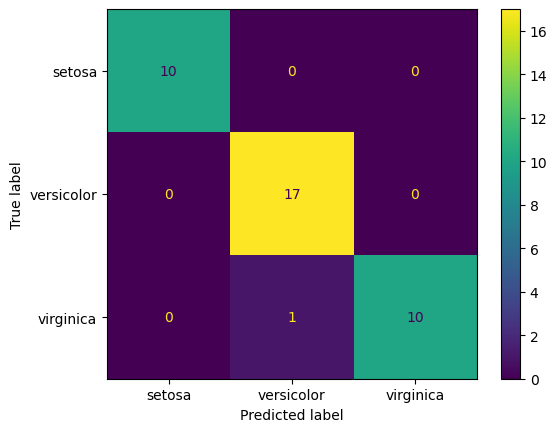

In [44]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

/Users/bomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


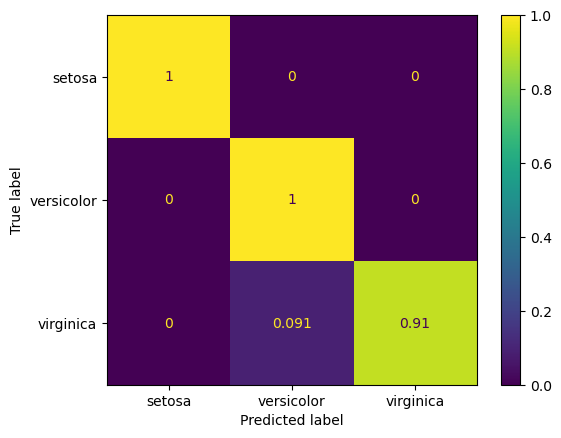

In [45]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,scaled_X_test,y_test,normalize='true')

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Precision:
For virginica, it's 1.00, indicating no instances were incorrectly labeled as virginica.

Recall:
For virginica, it's 0.91, suggesting some virginica instances were missed.

## Evaluating Curves and AUC

**We need to manually create the plots for a Multi-Class situation. I used the video link below for the reference.**

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

I have adopted a function that does this automatically, essentially creating and plotting an ROC per class.

In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

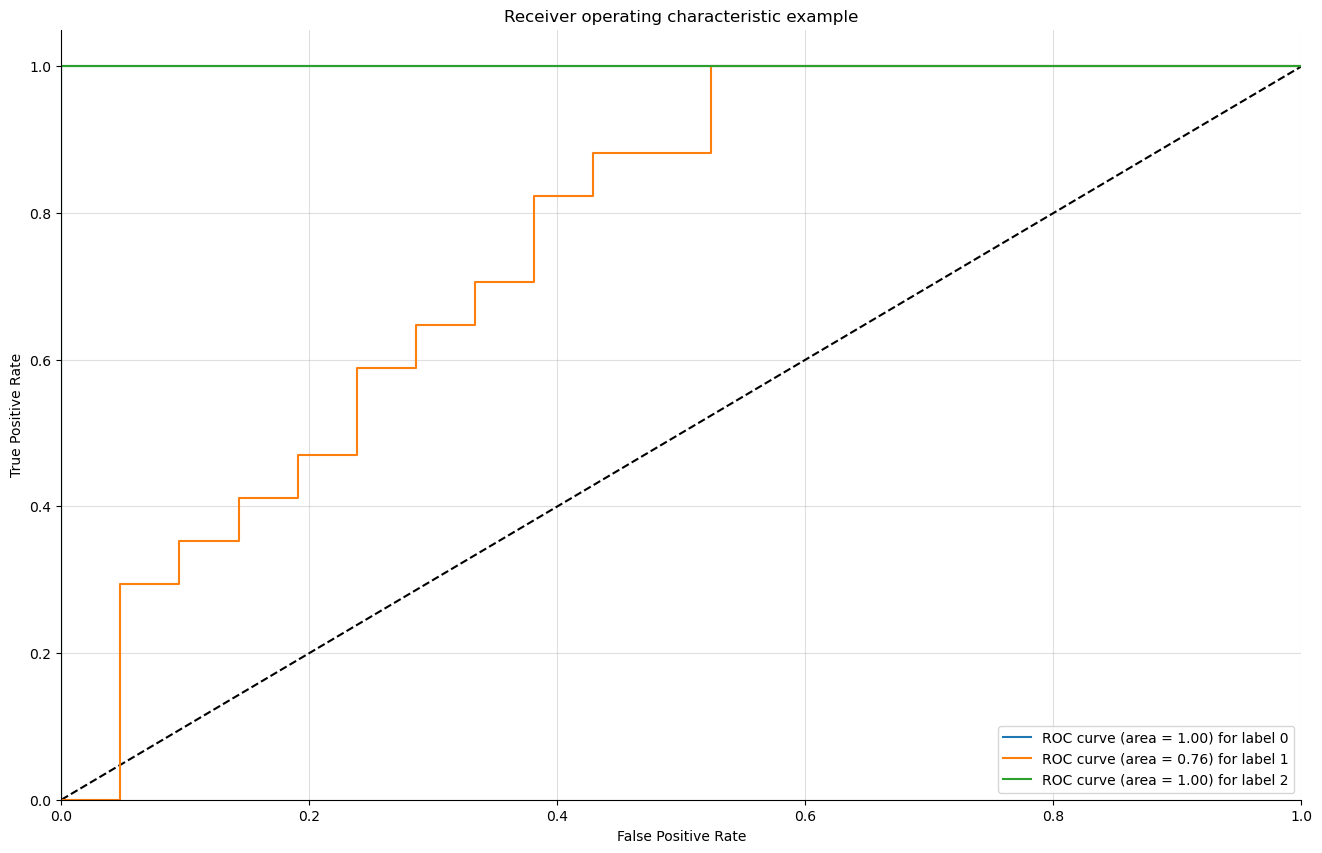

In [50]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))